In [3]:
import re, string, json, csv, hashlib, requests, tweepy

global api
consumer_key        = "2KVTe3bF62SX6e9xiUjrAXefy"
consumer_secret     = "sJI0rZPBE7BYHtd2QtzINwzKjrfd38Pl5WRC6ejr9dVUTKEN9r"
access_token        = "106638836-m9aD0K0mmMVHfvNBbg2kn4VD1imhLEcdOfNkRMby"
access_token_secret = "LFNeadXggcxztcCRun8AYMCVfgDu8wdM1wjs3gNHgsoiZ"
auth                = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api                 = tweepy.API(auth, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, compression=True)


In [21]:
import spacy

spacy.load('id')
nlp = spacy.blank('id')


OSError: [E050] Can't find model 'id'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [5]:
# words       = "saya selalu benar dan tidak mau tahu dengan keadaan yang di sekitar saya"
# stop_words  =  ["saya", "dan", "dengan", "yang", "di", "pokoknya", "keluar"]
# words_list  = words.split(" ")
# cleaned     = set(words_list) ^ set(stop_words)
# print(" ".join(list(cleaned)))


emotion = ['marah', 'sedih', 'senang', 'takut', 'khawatir', 'kesal']
sinonim = {}
for emosi in emotion:
    kamus_endpoint = "https://kateglo.com/api.php?format=json&phrase={keyword}".format(keyword=emosi)    
    response = requests.get(kamus_endpoint, verify=False)
    synonim = response.json()['kateglo']['relation']['s']    
    sinonim[emosi] = []
    for index, data in synonim.items():
        try:
#             print(data['related_phrase'])
            sinonim[emosi].append(data['related_phrase'])
        except:
            pass
#         sinonim[emosi].append(data['related_phrase'])
print(sinonim)
        

/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


KeyboardInterrupt: 

In [22]:
import pandas as pd

alay_df         = pd.read_csv('kamus_alay.csv', index_col=None, header=0)
kamus_alay_list = list(alay_df['slang'])
kamus_alay      = dict(zip(alay_df['slang'], alay_df['formal']))
for alay, formal in kamus_alay.items():
    print(alay, formal)

woww wow
aminn amin
met selamat
netaas menetas
keberpa keberapa
eeeehhhh eh
kata2nyaaa kata-katanya
hallo halo
kaka kakak
ka kak
daah dah
aaaaahhhh ah
yaa ya
smga semoga
slalu selalu
amiin amin
kk kakak
trus terus
sii sih
nyenengin menyenangkan
bgt banget
gemess gemas
akuuu aku
jgn jangan
udah sudah
gitu begitu
aja saja
gemesiin menggemaskan
menyenangkn menyenangkan
rb ribu
akau aku
saranin menyarankan
nemuin menemukan
yah ya
mnis2nya manis-manisnya
gtu begitu
tu itu
idolaa idola
bangett banget
kaakk kak
baaiikkk baik
telaatt telat
kaak kak
yg yang
lg lagi
skarang sekarang
sempet sempat
karna karena
ngga enggak
mantep mantap
loohhh loh
yeee ya
baguuuuus bagus
sampe sampai
ngikutin mengikuti
gayany gayanya
bnk bang
awaas awas
siip sip
abizzzz habis
kerrrrennnn keren
sayaa saya
pengen pengin
kpan kapan
sma sama
sdkit sedikit
bngt banget
lgu lagu
bener2 benar-benar
kharismanya karismanya
aq aku
jdi jadi
lgi lagi
gk enggak
kek kayak
lgunya lagunya
kereeeeennnn keren
nyamain menyamakan
laki

usahh usah
segala2nya segala-galanya
sekarng sekarang
sprti seperti
mkanya makanya
hay hai
mreka mereka
bhagia bahagia
korek2 korek-korek
ngebales membalas
krna karena
sihh sih
sasama sesama
dehh deh
cabe2an cabe-cabean
terong2an terong-terongan
seklian sekalian
kluar keluar
tuuu itu
ngurusan mengurusi
campurin mencampuri
emnknya memangnya
py punya
unyuu unyu
mrangkul merangkul
adlh adalah
wlo walau
lh boleh
manusiy manusia
tx tak
samara sakinah mawadah rahman
teringt teringat
trmsuk termasuk
dn dan
pilihnmu pilihanmu
swmntara sementara
trmasuk termasuk
orang2 orang-orang
sgt sangat
liht lihat
suaminy suaminya
jadulnya jaman dulunya
mantaff mantap
ngata2in mengatai-ngatai
bagaimna bagaimana
mulusssss mulus
bgus bagus
gmana bagaimana
kpleset kepleset
yawlah ya allah
kepeleset kepleset
kayanye kayanya
amiinnnn amin
komen2an komen-komenan
wewww wow
dumsss dong
tar entar
perbaikin memperbaiki
permasalhkan permasalahkan
betul2 betul-betul
jauhin jauhi
dateng datang
adiik adik
manisss manis


kepad kepada
bantuanny bantuannya
ttinggi tinggi
perna pernah
grgr gara-gara
jari2 jari-jari
pukulin pukuli
bengkak2 bengkak-bengkak
komentarin mengomentari
bijak2 bijak-bijak
lama2 lama-lama
menurur menurut
tipe2 tipe-tipe
diliat dilihat
liatlah lihatlah
teguran2 teguran-teguran
gr2 gara-gara
gamau enggak mau
skolah sekolah
pdahal padahal
klas kelas
tkut takut
grunya gurunya
pndah pindah
liat2 lihat-lihat
masukin memasuki
dilindungin dilindungi
kasiaannn kasihan
miring2 miring-miring
tinggalin tinggalkan
kaitannha kaitannya
sud sudah
pinter pintar
rana ranah
thdp terhadap
scr secara
bhkn bahkan
justeru justru
ngatai mengatai
kln kalian
sukak suka
termuraaahhhh termurah
brkunjun berkunjung
suarranya suaranya
bner" benar-benar
iu itu
bgussss bagus
kmaren kemarin
ambilin mengambil
biasaaaa biasa
luuuaar luar
redho ridho
rezki rezeki
kepd kepada
luaarrr luar
biasaaa biasa
jadilh jadilah
bnr benar
terhaaru terharu
orrunya orang tuanya
flm film
kalok kalo
adek2 adek-adek
loncatt loncat
hamp

am sama
tah teh
luthuna lucunya
astagaaa astaga
suaraynyaa suaranya
duanyaa duanya
anjayyyy anjay
coeggg coeg
ancur hancur
koplak kocak
uaaasssiiiik asik
boss bos
nyubit mencubit
dede adek
gemez gemas
tium cium
gemeeezzzz gemas
ppa papa
papahhhnya papahnya
duuuhh duh
ginting ganteng
bingiiittzz banget
iiihh ih
dedeknya adeknya
hadeeuh aduh
geneeee begini
yooow ya
gemezz gemas
gayax gayanya
infpyunnnn ampun
paraaah parah
papiii papi
kamunyaa kamunya
ngambek mengambek
haduuuh aduh
kapaan kapan
nginjek menginjak
putihnyaa putihnya
ituuuu itu
omaaaaaaakk oma
loncattt loncat
didatengin didatangi
abg abang
kmariiin kemarin
ayoklaa ayolah
jelasssss jelas
kaliiin kalian
ujunggg ujung
kaakaaaa kakak
srruu seru
kannn kan
jmpaaaa jumpa
yukkk yuk
haii hai
syukaaakkk suka
dengeeriin dengarkan
yakaliiiii yakali
atuhh atuh
ngertii mengerti
apalgi apalagi
akuh aku
mesrany mesranya
jendes janda
ngggk enggak
coccokk cocok
msa masa
jendesss janda
klepek2 klepek-klepek
bngtttt banget
ponakn ponakan
tantee

In [23]:
from spacy.lang.id.stop_words import STOP_WORDS

alay_df.shape

(15006, 7)

In [102]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


listStopword       = set(stopwords.words('indonesian'))
custom_stop_words  = ['gak', 'ga','kl', 'tdk', 'yg', 'hrs', 'utk', 'dg', 'dgn', 'tp', 'nya', 'dgn', 'udah', 'dah',
                     'sih', 'nih', 'kan', 'enggak', 'lha', 'nah', 'tuh', 'nya', 'yg', 'yuk', 'gw', 'gue', 'gua', 'guwa',
                     'pantes', 'kuy', 'sip', 'bro', 'sis', 'plis', 'ya', 'kalo', 'klw', 'klo', 'aja', 'say', 'sy',
                     'cyin', 'cin', 'skrg', 'drpd', 'timbang', 'ngga', 'oh', 'lho', 'kok', 'kek', 'kayak', 'lg', 'nak',
                     'ni', 'dkt', 'deket', 'nggak', 'kagak', 'ttp', 'teteup', 'moga', 'tu', 'bgt', 'banget', 'gengs', 
                     'gaes', 'guys', 'cuy', 'dpt', 'gaada', 'awan', 'duh', 'dr', 'karna', 'lu', 'elu', 'mah', 'ajah']

geo = '-6.2115,106.8452,2500km'

listStopwordFinal  = listStopword|set(custom_stop_words)
# fetched_tweets = api.search("Lockdown Indonesia -filter:retweets&verified", count = 1500, lang="id")
fetched_tweets = tweepy.Cursor(api.search, 
                               q='work from home exclude:retweets filter:verified', 
                               geocode=geo, 
                               lang="id", 
                               exclude_replies=True,
                               tweet_mode='extended').items(1500)
# ps = PorterStemmer() 
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

search_keyword = ["lockdown", "indonesia", "work", "from", "home"]

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

def clean_alay(string_alay):
    cleaned = []    
    words   = string_alay.lower().strip().split(' ')
#     words = nlp(string_alay)
    for word in words:
        if word in kamus_alay_list:
            word = kamus_alay[word]
        cleaned.append(word)
    return ' '.join(cleaned)
    
def remove_noise(tweet_masuk):
    # and all(ord(c) < 128 for c in word) \
    words           = tweet_masuk.lower().strip().split(' ')
#     words = nlp(tweet_masuk)
    return_words    = []    
    for word in words:
        word = word.rstrip().lstrip()
        if word == 'rt':
            index = words.index(word)+1
            words.remove(words[index])
            
        if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
        and not re.match('^@.*', word) \
        and not re.match('\s', word) \
        and '@' not in word \
        and 'https' not in word \
        and 'http' not in word \
        and word not in search_keyword \
        and word != 'rt' \
        and word != '':
            return_words.append(word)        
    return ' '.join(return_words)

def remove_stopword(tweet_masuk):
    removed = []
    doc     = nlp(tweet_masuk)
    for token in doc:
        lemmatized = [doc for doc in nlp(token.lemma_)]
#         print(lemmatized[0].text)
        if lemmatized[0].is_stop == False \
            and lemmatized[0].text not in search_keyword \
            and lemmatized[0].text not in custom_stop_words:
            finalized = "".join(str(lemmatized[0]))
            removed.append(finalized)
    return " ".join(removed)

i = 0;
final_data  = []
added_tweet = []
for tweet in fetched_tweets:
        parsed_tweet      = {}
        text_asli         = tweet.full_text.lower()
        if tweet.coordinates is not None:
            print(tweet.coordinates)
        hashed_tweet      = hashlib.md5(text_asli.encode('utf-8')).hexdigest()
        
        if hashed_tweet not in added_tweet:        
            added_tweet.append(hashed_tweet)
            removed_noise     = remove_noise(text_asli)   
            removed_alay      = clean_alay(removed_noise)
            removed_stopwords = remove_stopword(removed_alay)
            
            
            final_data.append([text_asli, removed_noise, removed_alay, removed_stopwords])

try:
    f = open("work_from_home_twitter.csv", "x")    
except:
    pass


f = open('work_from_home_twitter.csv', 'r+')
f.truncate(0)
f.close()

# print(final_data)
with open('work_from_home_twitter.csv', mode='w', newline='') as tweet_data:
    fieldnames = ['text_asli', 'removed_noise', 'removed_alay', 'removed_stopwords']
    writer = csv.DictWriter(tweet_data, fieldnames=fieldnames)
    writer.writeheader()
    for item in final_data:        
#         analysis = TextBlob(item[3])
        
        writer.writerow({'text_asli':item[0], 'removed_noise':item[1],'removed_alay':item[2], 'removed_stopwords': item[3]})
            
#         if "http" not in tweet.text:
#             line = re.sub("[^A-Za-z]", " ", tweet.text)
#             target.write(line+"\n")

In [103]:
df = pd.read_csv('work_from_home_twitter.csv', index_col=None, header=0)
df['removed_stopwords'].fillna(df['removed_noise'], inplace=True)
# df['sentiment'] = map(reduce df['removed_stopwords'])
df.shape

(257, 4)

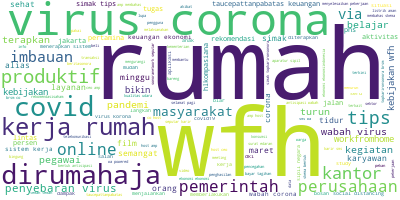

In [104]:
# Import the wordcloud library
# print(df['removed_stopwords'].values)
from wordcloud import WordCloud

df.drop(df.index[8])
# Join the different processed titles together.
long_string = ','.join(list(df['removed_stopwords'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

[('rumah', 87.0),
 ('wfh', 66.0),
 ('corona', 35.0),
 ('virus', 34.0),
 ('kerja', 32.0),
 ('19', 24.0),
 ('tips', 23.0),
 ('covid', 21.0),
 ('dirumahaja', 21.0),
 ('produktif', 20.0)]

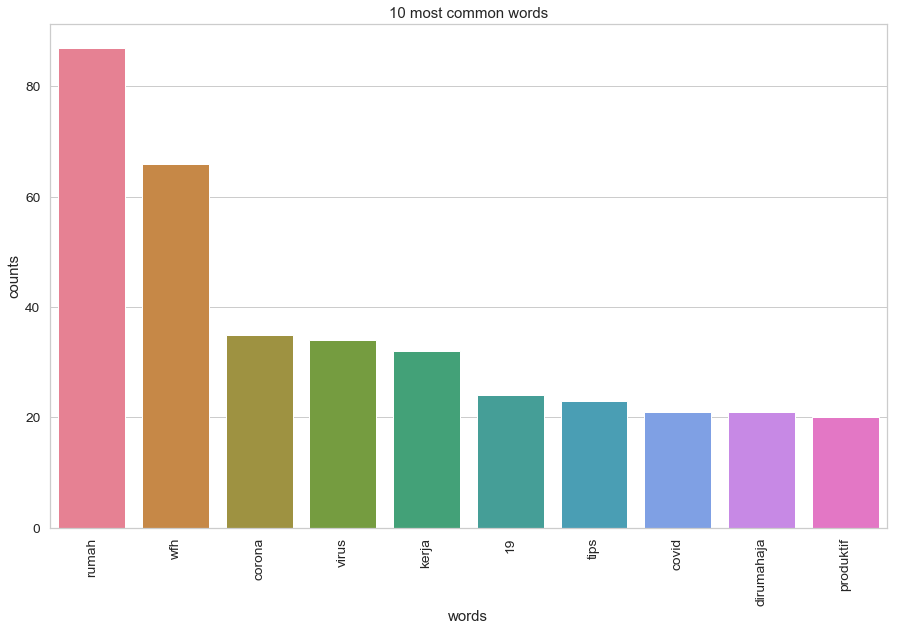

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words        = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    display(count_dict)
    words      = [w[0] for w in count_dict]
    counts     = [w[1] for w in count_dict]
    x_pos      = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=listStopwordFinal)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['removed_stopwords'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [106]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
host amp rumah 00 kerja turun corona 19 wa by

Topic #1:
corona virus rumah ekonomi film keuangan wfh taucepattanpabatas pertamina pandemi

Topic #2:
wfh salah terapkan hlkompasiana sanitizer hand satunya kebijakan kecepatan senjata

Topic #3:
wfh rumah tips kerja virus dirumahaja perusahaan produktif covid 19

Topic #4:
kecantikan perawatan diy rumah sipil pekerjaan asn lintas negara anak


In [93]:
from sklearn.cluster import KMeans

X = count_vectorizer.fit_transform(df['removed_noise']).toarray()
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=2, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.get_feature_names()

In [95]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 jokowi
 corona
 terburuk
 dampak
 menerima
 physicaldistancing
 cocok
 distancing
 mengkalkulasikan
 covid
Cluster 1:
 lockdown
 indonesia
 malaysia
 india
 19
 kebijakan
 covid
 amp
 pemerintah
 negara
Cluster 2:
 virus
 corona
 covid
 19
 lockdown
 wabah
 mengambil
 indonesia
 kebijakan
 negara


In [68]:
from sklearn.feature_selection import chi2
import numpy as np

'''Labelkan dulu dataset dengan emosi maupun positif negatif, baru lakukan ini'''
N = 3
for keyword, persamaan in sorted(sinonim.items()):
    features_chi2 = chi2(features, persamaan)
    indices       = np.argsort(features_chi2[0])
    features_name = np.array(tfidf.get_feature_names())[indices]
    unigram        = [v for v in features_name if len(v.split(' ')) == 1]    
    print("# '{}'".format(category))
    print(" . Most Corelated unigrams : \n     . {}".format('\n  . '.join(unigram[-N])))

ValueError: shapes (18,18) and (299,1445) not aligned: 18 (dim 1) != 299 (dim 0)